In [1]:
import pandas as pd
import numpy as np

### 파일 불러오기

In [2]:
data = pd.read_excel("data/data_weather.xlsx")
data.head()

,타임스탬프,귀하의 성별은 무엇입니까?,귀하의 연령대는 무엇입니까?,귀하의 거주 지역은 어디입니까?,오늘 기분은 어떠십니까?,1순위 음식 분야,2순위 음식 분야,3순위 음식 분야,1_한식,2_한식,...,2_일식,3_일식,1_중식,2_중식,3_중식,기온(°C),강수량(mm),습도(%),현지기압(hPa),전운량(10분위)
0,2021-05-16-14,남자,청년 (만 19세~만 34세 이하),"수도권 (경기, 인천)",행복하다 · 즐겁다 · 신난다,한식,일식,중식,"불고기, 김치찌개",NaN,...,"돈가스, 초밥",NaN,NaN,NaN,짬뽕,17.5,1.6,99.1,993.6,10
1,2021-05-16-15,여자,중장년 (만 35세~만 64세 이하),서울,화가 난다 · 짜증난다,한식,중식,일식,불고기,NaN,...,NaN,메밀소바,NaN,볶음밥,NaN,18.5,1.4,97.0,989.6,10
2,2021-05-16-15,남자,청년 (만 19세~만 34세 이하),서울,아무 생각 없다,일식,양식,한식,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
3,2021-05-16-15,여자,청년 (만 19세~만 34세 이하),서울,행복하다 · 즐겁다 · 신난다,일식,한식,분식,NaN,비빔밥,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
4,2021-05-16-16,남자,청년 (만 19세~만 34세 이하),경상도,행복하다 · 즐겁다 · 신난다,양식,일식,분식,NaN,NaN,...,"돈가스, 초밥",NaN,NaN,NaN,NaN,20.6,2.6,94.7,990.5,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   타임스탬프              401 non-null    object 
 1   귀하의 성별은 무엇입니까?     401 non-null    object 
 2   귀하의 연령대는 무엇입니까?    401 non-null    object 
 3   귀하의 거주 지역은 어디입니까?  401 non-null    object 
 4   오늘 기분은 어떠십니까?      401 non-null    object 
 5   1순위 음식 분야          401 non-null    object 
 6   2순위 음식 분야          401 non-null    object 
 7   3순위 음식 분야          401 non-null    object 
 8   1_한식               181 non-null    object 
 9   2_한식               101 non-null    object 
 10  3_한식               76 non-null     object 
 11  1_분식               36 non-null     object 
 12  2_분식               41 non-null     object 
 13  3_분식               63 non-null     object 
 14  1_양식               79 non-null     object 
 15  2_양식               76 non-null     object 
 16  3_양식               90 non-

# 전처리

In [4]:
# 결측치 확인
data.isnull().sum()

타임스탬프                  0
귀하의 성별은 무엇입니까?         0
귀하의 연령대는 무엇입니까?        0
귀하의 거주 지역은 어디입니까?      0
오늘 기분은 어떠십니까?          0
1순위 음식 분야              0
2순위 음식 분야              0
3순위 음식 분야              0
1_한식                 220
2_한식                 300
3_한식                 325
1_분식                 365
2_분식                 360
3_분식                 338
1_양식                 322
2_양식                 325
3_양식                 311
1_일식                 321
2_일식                 288
3_일식                 306
1_중식                 376
2_중식                 331
3_중식                 324
기온(°C)                 0
강수량(mm)                0
습도(%)                  0
현지기압(hPa)              0
전운량(10분위)              0
dtype: int64

### 컬럼명 변경

In [5]:
data.columns

Index(['타임스탬프', '귀하의 성별은 무엇입니까?', '귀하의 연령대는 무엇입니까?', '귀하의 거주 지역은 어디입니까?',
       '오늘 기분은 어떠십니까?', '1순위 음식 분야', '2순위 음식 분야', '3순위 음식 분야', '1_한식', '2_한식',
       '3_한식', '1_분식', '2_분식', '3_분식', '1_양식', '2_양식', '3_양식', '1_일식', '2_일식',
       '3_일식', '1_중식', '2_중식', '3_중식', '기온(°C)', '강수량(mm)', '습도(%)',
       '현지기압(hPa)', '전운량(10분위)'],
      dtype='object')

In [6]:
data.rename(columns={'타임스탬프':'시간대',
                     '귀하의 성별은 무엇입니까?':'성별',
                     '귀하의 연령대는 무엇입니까?':'연령대',
                     '귀하의 거주 지역은 어디입니까?':'지역',
                     '오늘 기분은 어떠십니까?':'기분',
                     '1순위 음식 분야':'1순위',
                     '2순위 음식 분야':'2순위',
                     '3순위 음식 분야':'3순위',
                     '기온(°C)':'기온',
                     '강수량(mm)':'강수량',
                     '습도(%)':'습도',
                     '현지기압(hPa)':'기압',
                     '전운량(10분위)':'전운량'}, inplace=True)

In [7]:
data.head()

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,1_한식,2_한식,...,2_일식,3_일식,1_중식,2_중식,3_중식,기온,강수량,습도,기압,전운량
0,2021-05-16-14,남자,청년 (만 19세~만 34세 이하),"수도권 (경기, 인천)",행복하다 · 즐겁다 · 신난다,한식,일식,중식,"불고기, 김치찌개",NaN,...,"돈가스, 초밥",NaN,NaN,NaN,짬뽕,17.5,1.6,99.1,993.6,10
1,2021-05-16-15,여자,중장년 (만 35세~만 64세 이하),서울,화가 난다 · 짜증난다,한식,중식,일식,불고기,NaN,...,NaN,메밀소바,NaN,볶음밥,NaN,18.5,1.4,97.0,989.6,10
2,2021-05-16-15,남자,청년 (만 19세~만 34세 이하),서울,아무 생각 없다,일식,양식,한식,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
3,2021-05-16-15,여자,청년 (만 19세~만 34세 이하),서울,행복하다 · 즐겁다 · 신난다,일식,한식,분식,NaN,비빔밥,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
4,2021-05-16-16,남자,청년 (만 19세~만 34세 이하),경상도,행복하다 · 즐겁다 · 신난다,양식,일식,분식,NaN,NaN,...,"돈가스, 초밥",NaN,NaN,NaN,NaN,20.6,2.6,94.7,990.5,10


### 날짜, 시간 열 추가

In [8]:
# data['시간대'] = pd.to_datetime(data['시간대'])

In [9]:
# data['월'] = data['시간'].dt.month
# data['일'] = data['시간'].dt.day
# data['시'] = data['시간'].dt.hour
# data['분'] = data['시간'].dt.minute

In [10]:
# data['날짜'] = data['시간대'].dt.strftime('%m-%d')
# data['시간'] = data['시간대'].dt.strftime('%H')

### 입력 데이터 값 전처리

In [11]:
data.loc[(data['지역']=='수도권 (경기, 인천)'), '지역'] = '수도권'
data.loc[(data['연령대']=='청소년 (~만 19세 미만)'), '연령대'] = '청소년'
data.loc[(data['연령대']=='청년 (만 19세~만 34세 이하)'), '연령대'] = '청년'
data.loc[(data['연령대']=='중장년 (만 35세~만 64세 이하)'), '연령대'] = '중장년'
data.loc[(data['연령대']=='노년 (만 65세 이상)'), '연령대'] = '노년'

In [12]:
data.loc[(data['기분']=='행복하다 · 즐겁다 · 신난다'), '기분'] = '행복'
data.loc[(data['기분']=='화가 난다 · 짜증난다'), '기분'] = '분노'
data.loc[(data['기분']=='아무 생각 없다'), '기분'] = '중립'
data.loc[(data['기분']=='우울하다 · 피곤하다 · 힘들다'), '기분'] = '우울'

In [13]:
data.head()

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,1_한식,2_한식,...,2_일식,3_일식,1_중식,2_중식,3_중식,기온,강수량,습도,기압,전운량
0,2021-05-16-14,남자,청년,수도권,행복,한식,일식,중식,"불고기, 김치찌개",NaN,...,"돈가스, 초밥",NaN,NaN,NaN,짬뽕,17.5,1.6,99.1,993.6,10
1,2021-05-16-15,여자,중장년,서울,분노,한식,중식,일식,불고기,NaN,...,NaN,메밀소바,NaN,볶음밥,NaN,18.5,1.4,97.0,989.6,10
2,2021-05-16-15,남자,청년,서울,중립,일식,양식,한식,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
3,2021-05-16-15,여자,청년,서울,행복,일식,한식,분식,NaN,비빔밥,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
4,2021-05-16-16,남자,청년,경상도,행복,양식,일식,분식,NaN,NaN,...,"돈가스, 초밥",NaN,NaN,NaN,NaN,20.6,2.6,94.7,990.5,10


# 더미화 (One-Hot Encoding)

In [14]:
# 사용자가 선택한 메뉴만 뽑아내어 split 하는 Code

menu_data = data.iloc[:, 8:23]

for i in range(len(menu_data)):
    menu_data.iloc[i] = menu_data.iloc[i].str.split(', ')
    
menu_data

,1_한식,2_한식,3_한식,1_분식,2_분식,3_분식,1_양식,2_양식,3_양식,1_일식,2_일식,3_일식,1_중식,2_중식,3_중식
0,"[불고기, 김치찌개]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[돈가스, 초밥]",NaN,NaN,NaN,[짬뽕]
1,[불고기],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[메밀소바],NaN,[볶음밥],NaN
2,NaN,NaN,"[불고기, 김치찌개]",NaN,NaN,NaN,NaN,[스테이크],NaN,"[돈가스, 메밀소바]",NaN,NaN,NaN,NaN,NaN
3,NaN,[비빔밥],NaN,NaN,NaN,[떡볶이],NaN,NaN,NaN,[초밥],NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,[떡볶이],[햄버거],NaN,NaN,NaN,"[돈가스, 초밥]",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,NaN,"[불고기, 김치찌개, 냉면]",NaN,NaN,NaN,NaN,NaN,NaN,"[파스타, 햄버거, 스테이크]","[초밥, 메밀소바]",NaN,NaN,NaN,NaN,NaN
397,NaN,"[불고기, 김치찌개, 냉면]",NaN,NaN,NaN,NaN,NaN,NaN,"[파스타, 햄버거, 스테이크]","[초밥, 메밀소바]",NaN,NaN,NaN,NaN,NaN
398,"[비빔밥, 된장찌개]",NaN,NaN,NaN,"[떡볶이, 김밥]",NaN,NaN,NaN,NaN,NaN,NaN,"[돈가스, 메밀소바]",NaN,NaN,NaN
399,"[불고기, 냉면]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[초밥, 메밀소바]",NaN,NaN,NaN,"[짜장면, 볶음밥]"


In [15]:
# 각 행의 메뉴를 한 리스트로 합치고, 이를 각 행 번호를 key로 갖는 딕셔너리로 만드는 Code

tmp_list = []
menu_dic = {}

for i in range(len(menu_data)):
    temp = menu_data.loc[i]
    for j in range(len(temp)):
        
        if type(temp.iloc[j]) == list:
            
            tmp_list += temp.iloc[j]
    
    menu_dic[i] = tmp_list
    tmp_list = []

In [16]:
# 각 카테고리에 해당하는 메뉴는 처음에 0으로 만들고,
## 사용자가 선택한 데이터를 1로 만드는 Code

category_dic = {'한식': ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개'],
          '분식': ['떡볶이', '김밥'],
          '양식': ['파스타', '스테이크', '햄버거'],
          '일식': ['초밥', '우동', '메밀소바', '돈가스'],
          '중식': ['볶음밥', '짬뽕', '짜장면']}

menu_list = ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥', '파스타',
'스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕']

result_df = pd.DataFrame(columns=menu_list)

for i in range(len(data)):
    result_df.loc[i, category_dic[data.loc[i, '1순위']]] = 0 
    result_df.loc[i, category_dic[data.loc[i, '2순위']]] = 0 
    result_df.loc[i, category_dic[data.loc[i, '3순위']]] = 0 
    

    
    result_df.loc[i, menu_dic[i]] = 1
    
    ##가중치 적용 
    result_df.loc[i, category_dic[data.loc[i, '1순위']]]=result_df.loc[i, category_dic[data.loc[i, '1순위']]]*3
    result_df.loc[i, category_dic[data.loc[i, '2순위']]]=result_df.loc[i, category_dic[data.loc[i, '2순위']]]*2
    result_df.loc[i, category_dic[data.loc[i, '3순위']]]=result_df.loc[i, category_dic[data.loc[i, '3순위']]]*1
     
result_df=result_df.fillna(0)
result_df

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
0,3,0,0,0,0,3,0,0,0,0,0,2,0,0,2,0,0,1
1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0
2,1,0,0,0,0,1,0,0,0,2,0,0,0,3,3,0,0,0
3,0,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,3,2,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2,2,0,0,0,2,0,0,1,1,1,3,0,3,0,0,0,0
397,2,2,0,0,0,2,0,0,1,1,1,3,0,3,0,0,0,0
398,0,0,0,3,3,0,2,2,0,0,0,0,0,1,1,0,0,0
399,3,3,0,0,0,0,0,0,0,0,0,2,0,2,0,1,1,0


In [17]:
result_df.count()

불고기     401
냉면      401
칼국수     401
된장찌개    401
비빔밥     401
김치찌개    401
떡볶이     401
김밥      401
파스타     401
스테이크    401
햄버거     401
초밥      401
우동      401
메밀소바    401
돈가스     401
볶음밥     401
짜장면     401
짬뽕      401
dtype: int64

In [18]:
result_df

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
0,3,0,0,0,0,3,0,0,0,0,0,2,0,0,2,0,0,1
1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0
2,1,0,0,0,0,1,0,0,0,2,0,0,0,3,3,0,0,0
3,0,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,3,2,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2,2,0,0,0,2,0,0,1,1,1,3,0,3,0,0,0,0
397,2,2,0,0,0,2,0,0,1,1,1,3,0,3,0,0,0,0
398,0,0,0,3,3,0,2,2,0,0,0,0,0,1,1,0,0,0
399,3,3,0,0,0,0,0,0,0,0,0,2,0,2,0,1,1,0


In [19]:
result_df.mean()*100

불고기     86.533666
냉면      50.124688
칼국수     37.655860
된장찌개    69.825436
비빔밥     74.563591
김치찌개    65.586035
떡볶이     56.608479
김밥      27.431421
파스타     64.089776
스테이크    54.862843
햄버거     42.144638
초밥      84.289277
우동      35.411471
메밀소바    48.877805
돈가스     61.845387
볶음밥     20.199501
짜장면     37.406484
짬뽕      36.159601
dtype: float64

## 최종 dataset 만들기

In [20]:
info = data.iloc[:, :8]
info

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위
0,2021-05-16-14,남자,청년,수도권,행복,한식,일식,중식
1,2021-05-16-15,여자,중장년,서울,분노,한식,중식,일식
2,2021-05-16-15,남자,청년,서울,중립,일식,양식,한식
3,2021-05-16-15,여자,청년,서울,행복,일식,한식,분식
4,2021-05-16-16,남자,청년,경상도,행복,양식,일식,분식
...,...,...,...,...,...,...,...,...
396,2021-05-20-15,남자,청소년,경상도,행복,일식,한식,양식
397,2021-05-20-15,남자,청소년,경상도,행복,일식,한식,양식
398,2021-05-20-15,여자,청년,수도권,중립,한식,분식,일식
399,2021-05-22-09,남자,중장년,서울,우울,한식,일식,중식


In [21]:
weather = data.iloc[:, -5:]
weather

,기온,강수량,습도,기압,전운량
0,17.5,1.6,99.1,993.6,10
1,18.5,1.4,97.0,989.6,10
2,18.5,1.4,97.0,989.6,10
3,18.5,1.4,97.0,989.6,10
4,20.6,2.6,94.7,990.5,10
...,...,...,...,...,...
396,16.3,0.7,91.6,993.1,9
397,16.3,0.7,91.6,993.1,9
398,20.7,0.0,54.8,997.0,10
399,17.5,0.0,82.0,1001.8,7


### 필요한 컬럼만 concat

In [22]:
d1 = pd.concat([info, weather], axis=1)

In [23]:
final_data = pd.concat([d1, result_df], axis=1)

In [24]:
final_data['시간대']

0      2021-05-16-14
1      2021-05-16-15
2      2021-05-16-15
3      2021-05-16-15
4      2021-05-16-16
           ...      
396    2021-05-20-15
397    2021-05-20-15
398    2021-05-20-15
399    2021-05-22-09
400    2021-05-22-09
Name: 시간대, Length: 401, dtype: object

In [25]:
# 시간대를 datetime 타입으로 변경

final_data['시간대'] = pd.to_datetime(final_data['시간대'])

In [26]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시간대     401 non-null    datetime64[ns]
 1   성별      401 non-null    object        
 2   연령대     401 non-null    object        
 3   지역      401 non-null    object        
 4   기분      401 non-null    object        
 5   1순위     401 non-null    object        
 6   2순위     401 non-null    object        
 7   3순위     401 non-null    object        
 8   기온      401 non-null    float64       
 9   강수량     401 non-null    float64       
 10  습도      401 non-null    float64       
 11  기압      401 non-null    float64       
 12  전운량     401 non-null    int64         
 13  불고기     401 non-null    int64         
 14  냉면      401 non-null    int64         
 15  칼국수     401 non-null    int64         
 16  된장찌개    401 non-null    int64         
 17  비빔밥     401 non-null    int64         
 18  김치찌개    40

### 날짜, 시간, 요일 컬럼 추가

In [27]:
final_data['날짜'] = final_data['시간대'].dt.strftime('%m-%d')
final_data['시간'] = final_data['시간대'].dt.strftime('%H')
final_data['요일'] = final_data['시간대'].dt.dayofweek

In [28]:
final_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,2,0,0,2,0,0,1,05-16,14,6
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,0,1,0,2,0,0,05-16,15,6
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,0,3,3,0,0,0,05-16,15,6
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,3,0,0,0,0,0,0,05-16,15,6
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,2,0,0,2,0,0,0,05-16,16,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2021-05-20 15:00:00,남자,청소년,경상도,행복,일식,한식,양식,16.3,0.7,...,3,0,3,0,0,0,0,05-20,15,3
397,2021-05-20 15:00:00,남자,청소년,경상도,행복,일식,한식,양식,16.3,0.7,...,3,0,3,0,0,0,0,05-20,15,3
398,2021-05-20 15:00:00,여자,청년,수도권,중립,한식,분식,일식,20.7,0.0,...,0,0,1,1,0,0,0,05-20,15,3
399,2021-05-22 09:00:00,남자,중장년,서울,우울,한식,일식,중식,17.5,0.0,...,2,0,2,0,1,1,0,05-22,09,5


### 요일을 한글로 변경

In [29]:
weekday = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}

final_data.replace({'요일':weekday}, inplace=True)

In [30]:
final_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,2,0,0,2,0,0,1,05-16,14,일
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,0,1,0,2,0,0,05-16,15,일
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,0,3,3,0,0,0,05-16,15,일
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,3,0,0,0,0,0,0,05-16,15,일
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,2,0,0,2,0,0,0,05-16,16,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2021-05-20 15:00:00,남자,청소년,경상도,행복,일식,한식,양식,16.3,0.7,...,3,0,3,0,0,0,0,05-20,15,목
397,2021-05-20 15:00:00,남자,청소년,경상도,행복,일식,한식,양식,16.3,0.7,...,3,0,3,0,0,0,0,05-20,15,목
398,2021-05-20 15:00:00,여자,청년,수도권,중립,한식,분식,일식,20.7,0.0,...,0,0,1,1,0,0,0,05-20,15,목
399,2021-05-22 09:00:00,남자,중장년,서울,우울,한식,일식,중식,17.5,0.0,...,2,0,2,0,1,1,0,05-22,09,토


In [31]:
final_data.drop(["시간대","지역","요일","1순위","2순위","3순위","날짜"],axis=1)

,성별,연령대,기분,기온,강수량,습도,기압,전운량,불고기,냉면,...,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,시간
0,남자,청년,행복,17.5,1.6,99.1,993.6,10,3,0,...,0,0,2,0,0,2,0,0,1,14
1,여자,중장년,분노,18.5,1.4,97.0,989.6,10,3,0,...,0,0,0,0,1,0,2,0,0,15
2,남자,청년,중립,18.5,1.4,97.0,989.6,10,1,0,...,2,0,0,0,3,3,0,0,0,15
3,여자,청년,행복,18.5,1.4,97.0,989.6,10,0,0,...,0,0,3,0,0,0,0,0,0,15
4,남자,청년,행복,20.6,2.6,94.7,990.5,10,0,0,...,0,3,2,0,0,2,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,남자,청소년,행복,16.3,0.7,91.6,993.1,9,2,2,...,1,1,3,0,3,0,0,0,0,15
397,남자,청소년,행복,16.3,0.7,91.6,993.1,9,2,2,...,1,1,3,0,3,0,0,0,0,15
398,여자,청년,중립,20.7,0.0,54.8,997.0,10,0,0,...,0,0,0,0,1,1,0,0,0,15
399,남자,중장년,우울,17.5,0.0,82.0,1001.8,7,3,3,...,0,0,2,0,2,0,1,1,0,09


### 최종 dataset 저장

In [32]:
final_data.to_csv('data/final_data.csv')

# EDA

In [33]:
demo = data.iloc[:, 1:3]

In [34]:
demo

,성별,연령대
0,남자,청년
1,여자,중장년
2,남자,청년
3,여자,청년
4,남자,청년
...,...,...
396,남자,청소년
397,남자,청소년
398,여자,청년
399,남자,중장년


In [35]:
demod = pd.get_dummies(demo)

In [36]:
demod

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년
0,1,0,0,0,1,0
1,0,1,0,1,0,0
2,1,0,0,0,1,0
3,0,1,0,0,1,0
4,1,0,0,0,1,0
...,...,...,...,...,...,...
396,1,0,0,0,0,1
397,1,0,0,0,0,1
398,0,1,0,0,1,0
399,1,0,0,1,0,0


In [37]:
demodp = demod.corr(method='pearson')
demodp

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년
성별_남자,1.000000,-1.000000,0.009145,-0.089763,-0.039571,0.123711
성별_여자,-1.000000,1.000000,-0.009145,0.089763,0.039571,-0.123711
연령대_노년,0.009145,-0.009145,1.000000,-0.080593,-0.125549,-0.093791
연령대_중장년,-0.089763,0.089763,-0.080593,1.000000,-0.497066,-0.371332
연령대_청년,-0.039571,0.039571,-0.125549,-0.497066,1.000000,-0.578467
연령대_청소년,0.123711,-0.123711,-0.093791,-0.371332,-0.578467,1.000000


<AxesSubplot:>

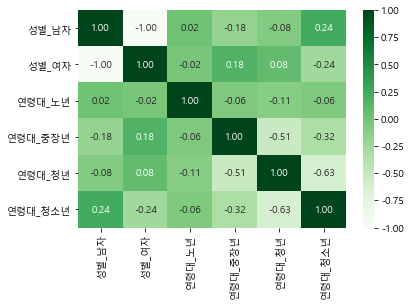

In [38]:
# 한글 문제 해결
# matplotlib의 기본폰트에서 한글이 지원되지 않음
# 시스템별로 한글 지원하는 폰트로 변경해야 함
import platform
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')
sns.heatmap(demodp.corr(),
           annot = True,
           fmt = '.2f',
           cmap = 'Greens',
           vmin = -1, vmax=1)

In [39]:
# r=-1.000 ~ r=-0.600  높은 음의 상관관계
# r=-0.599 ~ r=-0.400  중간 음의 상관관계
# r=-3.999 ~ r=-0.200  낮은 음의 상관관계
# r=-0.199 ~ r=+0.199  무상관
# r=+0.200 ~ r=+0.399  낮은 양의 상관관계
# r=+0.400 ~ r=+0.599  중간 양의 상관관계
# r=+0.600 ~ r=+1.000  높은 양의 상관관계

#### 켄달

In [40]:
import scipy.stats as stats

# kendall
stats.kendalltau(data['성별'], data['연령대'])

KendalltauResult(correlation=-0.11629881106660325, pvalue=0.013399138373362917)

#### 스피어만

In [41]:
# spearman
stats.spearmanr(data['성별'], data['연령대'])

SpearmanrResult(correlation=-0.12364903435668924, pvalue=0.013217445029930382)

#### 켄달

In [42]:
corr = final_data.corr(method='kendall')

In [43]:
corr

,기온,강수량,습도,기압,전운량,불고기,냉면,칼국수,된장찌개,비빔밥,...,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
기온,1.000000,-0.252941,-0.537590,0.103714,-0.355579,0.005692,0.078782,-0.011569,-0.078828,-0.001411,...,0.041404,0.010905,-0.077740,-0.037579,-0.068778,-0.015607,-0.068293,-0.060830,-0.074344,0.064573
강수량,-0.252941,1.000000,0.623833,-0.688523,0.650924,-0.001487,0.009919,0.087169,0.071504,0.017691,...,-0.007639,0.120019,0.091996,-0.019413,0.070707,0.014291,0.039762,0.046007,0.109969,0.108629
습도,-0.537590,0.623833,1.000000,-0.497372,0.610467,0.010173,-0.048329,0.067495,0.036513,0.026197,...,-0.059672,0.100372,0.069004,-0.004656,0.080464,0.005600,0.047690,0.021414,0.116813,0.058515
기압,0.103714,-0.688523,-0.497372,1.000000,-0.616068,0.014755,0.003980,-0.041862,-0.032539,-0.018566,...,0.031677,-0.086376,-0.056732,0.061569,0.000000,0.017450,0.003662,-0.005446,-0.073510,-0.107834
전운량,-0.355579,0.650924,0.610467,-0.616068,1.000000,-0.010018,-0.030265,0.056558,0.123813,-0.031325,...,-0.051426,0.051516,0.063133,0.004177,0.044149,-0.017827,0.082797,0.084198,0.114824,0.073191
불고기,0.005692,-0.001487,0.010173,0.014755,-0.010018,1.000000,0.115251,0.003285,0.079174,0.046667,...,-0.035946,0.061023,0.071267,0.002354,0.072257,-0.004277,0.100530,0.034231,0.004779,-0.082542
냉면,0.078782,0.009919,-0.048329,0.003980,-0.030265,0.115251,1.000000,0.200360,0.047207,-0.016521,...,0.072566,0.041540,0.048157,0.154628,0.088633,0.212764,0.036848,-0.037948,-0.072830,-0.044471
칼국수,-0.011569,0.087169,0.067495,-0.041862,0.056558,0.003285,0.200360,1.000000,0.061765,0.101712,...,0.088602,0.070457,0.014180,0.043693,0.163915,0.104444,0.045398,0.026095,-0.058428,0.000369
된장찌개,-0.078828,0.071504,0.036513,-0.032539,0.123813,0.079174,0.047207,0.061765,1.000000,0.045172,...,-0.007232,0.033924,-0.038717,-0.013519,0.125916,-0.026379,-0.028317,0.012803,-0.097980,-0.023671
비빔밥,-0.001411,0.017691,0.026197,-0.018566,-0.031325,0.046667,-0.016521,0.101712,0.045172,1.000000,...,-0.037405,0.006748,-0.060885,-0.007696,0.032366,0.026529,-0.011891,0.005286,-0.037024,-0.045968


<AxesSubplot:>

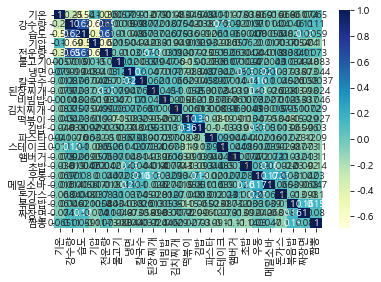

In [44]:
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True)

#### 스피어만

In [45]:
corr2 = final_data.corr(method='spearman')

<AxesSubplot:>

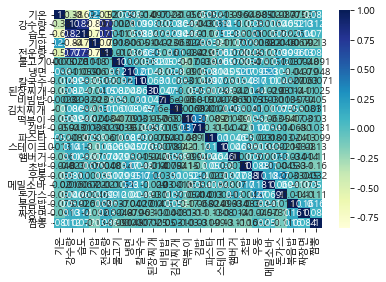

In [46]:
sns.heatmap(corr2,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True)